In [1]:
!pip install numpy opencv-python matplotlib

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("C:\\Image Classifier\\Model\\Test image\\IMG_20250608_020107_545.jpg")
img.shape

(1280, 961, 3)

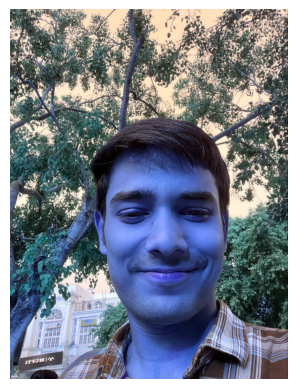

In [4]:
plt.imshow(img)
plt.axis("off")
plt.show()

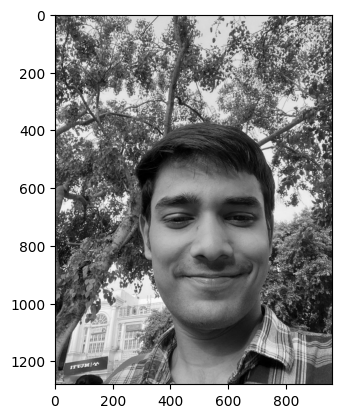

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray,cmap = 'gray')
plt.axis("on")
plt.show()

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[250, 485, 559, 559]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(250), np.int32(485), np.int32(559), np.int32(559))

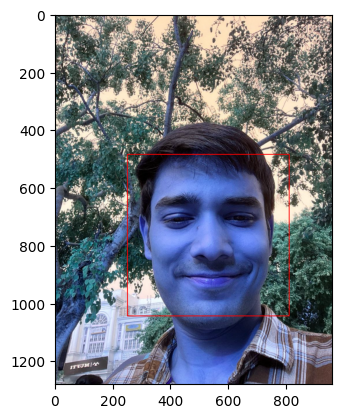

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

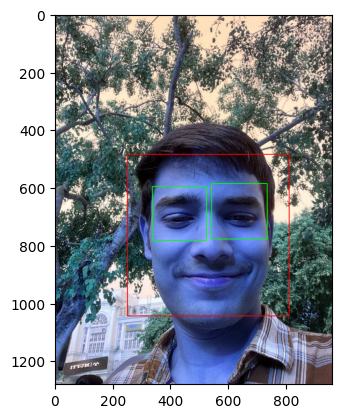

In [9]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex, ey, ew, eh) in eyes:
        # Only detect eyes in upper ~40% of face height
        if 0 <= ey <= int(0.4 * h):
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show() 

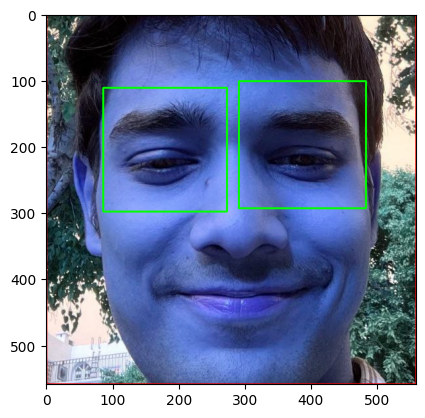

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [11]:
cropped_img = np.array(roi_color)
cropped_img.shape

(559, 559, 3)

In [12]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Warning: unable to read image at path: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

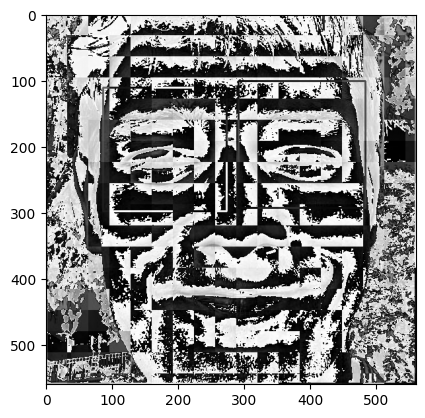

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

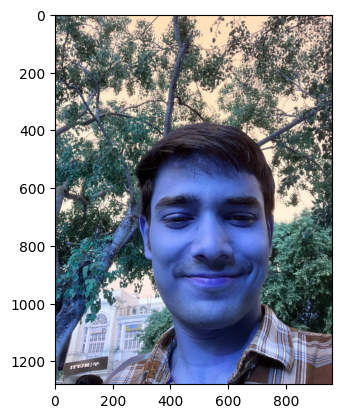

In [15]:
original_image = cv2.imread("C:\\Image Classifier\\Model\\Test image\\IMG_20250608_020107_545.jpg")
plt.imshow(original_image)
plt.show()

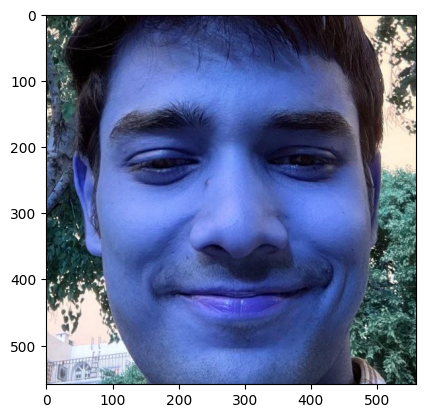

In [16]:
cropped_image = get_cropped_image_if_2_eyes("C:\\Image Classifier\\Model\\Test image\\IMG_20250608_020107_545.jpg")
plt.imshow(cropped_image)
plt.show()

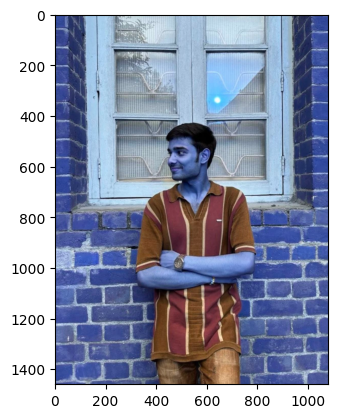

In [17]:
org_image_obstructed = cv2.imread("C:\\Image Classifier\\Model\\Test image\\anuj_sha.jpg")
plt.imshow(org_image_obstructed) 
plt.show()

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Image Classifier\\Model\\Test image\\anuj_sha.jpg")
cropped_image_no_2_eyes

In [19]:
path_to_data = "./Model/Dataset/"
path_to_cr_data = "./Model/Dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
import os
print(os.getcwd())

C:\Image Classifier


In [22]:
img_dirs

['./Model/Dataset/Anuj',
 './Model/Dataset/Aryan',
 './Model/Dataset/cropped',
 './Model/Dataset/Krishna',
 './Model/Dataset/Mohit',
 './Model/Dataset/Vritti']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

Anuj
Generating cropped images in folder:  ./Model/Dataset/cropped/Anuj
Aryan
Generating cropped images in folder:  ./Model/Dataset/cropped/Aryan
cropped
Krishna
Generating cropped images in folder:  ./Model/Dataset/cropped/Krishna
Mohit
Generating cropped images in folder:  ./Model/Dataset/cropped/Mohit
Vritti
Generating cropped images in folder:  ./Model/Dataset/cropped/Vritti


In [54]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Anuj': ['./Model/Dataset/cropped/Anuj\\Anuj1.png',
  './Model/Dataset/cropped/Anuj\\Anuj10.png',
  './Model/Dataset/cropped/Anuj\\Anuj11.png',
  './Model/Dataset/cropped/Anuj\\Anuj12.png',
  './Model/Dataset/cropped/Anuj\\Anuj13.png',
  './Model/Dataset/cropped/Anuj\\Anuj14.png',
  './Model/Dataset/cropped/Anuj\\Anuj15.png',
  './Model/Dataset/cropped/Anuj\\Anuj16.png',
  './Model/Dataset/cropped/Anuj\\Anuj17.png',
  './Model/Dataset/cropped/Anuj\\Anuj2.png',
  './Model/Dataset/cropped/Anuj\\Anuj3.png',
  './Model/Dataset/cropped/Anuj\\Anuj4.png',
  './Model/Dataset/cropped/Anuj\\Anuj5.png',
  './Model/Dataset/cropped/Anuj\\Anuj6.png',
  './Model/Dataset/cropped/Anuj\\Anuj7.png',
  './Model/Dataset/cropped/Anuj\\Anuj8.png',
  './Model/Dataset/cropped/Anuj\\Anuj9.png'],
 'Aryan': ['./Model/Dataset/cropped/Aryan\\Aryan10.png',
  './Model/Dataset/cropped/Aryan\\Aryan11.png',
  './Model/Dataset/cropped/Aryan\\Aryan12.png',
  './Model/Dataset/cropped/Aryan\\Aryan13.png',
  './Model/Datase

In [55]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Anuj': 0, 'Aryan': 1, 'Krishna': 2, 'Mohit': 3, 'Vritti': 4}

In [56]:
!pip install PyWavelets

In [57]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [58]:
len(X[0])

4096

In [59]:
X[0]

array([[ 53],
       [ 32],
       [200],
       ...,
       [211],
       [  4],
       [  2]], shape=(4096, 1), dtype=uint8)

In [60]:
y[0]

0

In [61]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(98, 4096)

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
!pip install scikit-learn

In [64]:
import sklearn

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
# After collecting X and y
X = np.array([x.flatten() for x in X])  # flatten each (4096,1) to (4096,)
y = np.array(y)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))
])

pipe.fit(X_train, y_train)
print("Accuracy:", pipe.score(X_test, y_test))


Accuracy: 0.64


In [67]:
len(X_test)

25

In [68]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.40      0.50      0.44         4
           2       0.57      0.67      0.62         6
           3       0.71      1.00      0.83         5
           4       0.75      0.75      0.75         4

    accuracy                           0.64        25
   macro avg       0.69      0.65      0.63        25
weighted avg       0.70      0.64      0.63        25



In [69]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
!pip install pandas

In [71]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [72]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\45mrm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\45mrm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\45mrm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value t

,model,best_score,best_params
0,svm,0.753333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.550476,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.657143,{'logisticregression__C': 1}


In [73]:
best_estimators['svm'].score(X_test,y_test)

0.64

In [74]:
best_estimators['random_forest'].score(X_test,y_test)

0.44

In [75]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.56

In [76]:
best_clf = best_estimators['svm']

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 1, 2, 1, 0],
       [0, 2, 1, 0, 1],
       [0, 1, 4, 1, 0],
       [0, 0, 0, 5, 0],
       [0, 1, 0, 0, 3]])

In [78]:
!pip install seaborn

Text(95.72222222222221, 0.5, 'Truth')

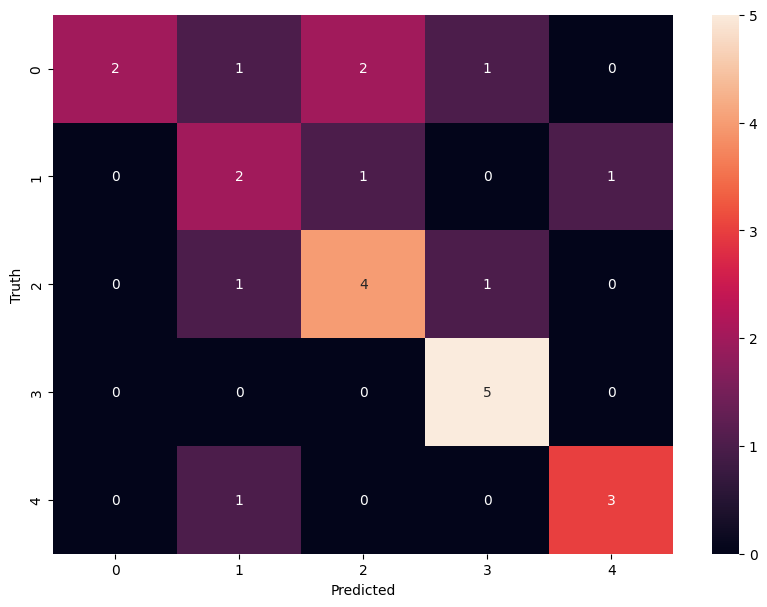

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
class_dict

{'Anuj': 0, 'Aryan': 1, 'Krishna': 2, 'Mohit': 3, 'Vritti': 4}

In [81]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))